1. Define a function that, given a text, creates the corresponding discrete 
source

In [416]:

def conta_occurrenze_lettere(testo):
    # Crea un dizionario per tenere traccia delle occorrenze di ogni lettera
    code = {}
    testo = testo.replace(' ', '')
    # Conta le occorrenze di ogni lettera nel testo
    for char in testo:
        # Ignora gli spazi vuoti
        if char != ' ':
            code[char.lower()] = round(testo.count(char.lower())/len(testo), 5)
    code = sorted(code.items(), key=lambda x: x[1], reverse=True)
    symbols = [item[0] for item in code]
    probs = [item[1] for item in code]

    return symbols, probs

# Esempio di testo
testo = "mamma mia"

# Conta le occorrenze di ogni lettera nel testo
symbs, probs = conta_occurrenze_lettere(testo)

# Stampare le occorrenze di ogni lettera
print("Occorrenze di ogni lettera nel testo:")
for s in symbs:
    print(f"{s}: {probs[symbs.index(s)]}")
 


Occorrenze di ogni lettera nel testo:
m: 0.5
a: 0.375
i: 0.125


2. Add a method Huffman to the class Source that computes the Huffman 
encoding. 

In [417]:
import heapq
import matplotlib.pyplot as plt

In [418]:
class Node:
    def __init__(self, characters, float_number, left=None, right=None):
        self.characters = characters
        self.float_number = float_number
        self.left = left
        self.right = right


    

In [419]:
class Source:
    def __init__(self, probabilities, *symbols):
        if not isinstance(probabilities, list):
            raise ValueError("Probabilities must be a non-empty list")
        if not symbols or len(symbols) != len(probabilities):
            self.symbols = [str(i) for i in range(len(probabilities))]
        else:
            self.symbols = symbols     
        if not all(isinstance(p, (int, float)) and 0 <= p <= 1 for p in probabilities):
            raise ValueError("All probabilities must be numbers between 0 and 1")
        if round(sum(probabilities),5) != 1:
            raise ValueError("Probabilities must sum to 1")
        self.probabilities = probabilities
        self.size=len(probabilities)
        #Several alternatives:  #dictionary of probabilities
        self.prob = {self.symbols[i]:self.probabilities[i] for i in range(len(probabilities))} 
        #or
        self.mappa= list(zip(self.symbols,self.probabilities))
    
        
    def entropy(self, d=2):
        import math
        entropy = 0
        for probability in self.probabilities:
            entropy -= probability * math.log(probability,d)
        return entropy
    
    def __str__(self):
        return self.mappa.__str__()
        
    def compute_average_code_length(self,code):
        if len(code) != self.size:
            raise ValueError("Code and probabilities must have the same length")
        average_length = 0
        for i in range(len(code)):
            average_length += len(code[i]) * self.probabilities[i]
        return average_length

    def efficiency(self,code, d=2):
        entropy = self.entropy(d)
        average_length = self.compute_average_code_length(code)
        return (entropy - average_length) / entropy

    def redudancy(self,code):
        return 1 - self.efficiency(code)
    
    def kraft_mcmillan(self,lengths, d=2):
        return sum([d**(-lengths[i]) for i in range(self.size)])<=1
    
    def create_prefix_code(self,lengths, d=2):
        if not self.kraft_mcmillan(lengths,d):
            return []
        else:
            code=[]

            #ADD THE CODE HERE

            return code
    
    def shannon_fano(self):
        pass

    def shannon_encoding(self, d=2):
        pass
           
    def huffman(self, text):
        temp = []
        symbols, probs = conta_occurrenze_lettere(text)

        # Inserisci i nodi iniziali nella struttura temporanea
        for s in symbols:
            y = Node(s, probs[symbols.index(s)])
            temp.append(y)

        # Costruisci l'albero di Huffman bottom-up
        while len(temp) > 1:
            # Unisci i due nodi più piccoli
            temp = sorted(temp, key=lambda x: x.float_number)
            a = temp.pop(0)
            b = temp.pop(0)
            merged_characters = a.characters + b.characters
            merged_float_number = a.float_number + b.float_number
            new_node = Node(merged_characters, merged_float_number, left=a, right=b)
            temp.append(new_node)
            #print(new_node.characters, new_node.float_number)
        root = temp[0]

        # Stampare l'albero binario di Huffman
        code = print_huffman_tree(root)
        
        return root, code


def print_huffman_tree(node, prefix='', code=[]):
    if node is not None:
        if node.left is None and node.right is None:
            stringa = f"Character: {node.characters}, Probability: {node.float_number}, Huffman Code: {prefix}"
            print(stringa)
            code.append(stringa)
        else:
            print_huffman_tree(node.left, prefix + '0', code)
            print_huffman_tree(node.right, prefix + '1', code)
    return code

def extract_code(huffman_output):
    code = {}
    for item in huffman_output:
        char = item.split(',')[0][11]
        code[char] = item.split(',')[2][15:]
    return code

def codingText(text, code):
    codedText = ''
    for char in text:
        if char != ' ':
            codedText += code[char]
    return codedText      
    


In [420]:
def plot_huffman_tree(node, x=0, y=0, dx=1, dy=0.8, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    
    if node is not None:
        # Disegna il nodo
        ax.text(x, y, str(f'{node.characters} \n{node.float_number}'), ha='center', va='center', bbox=dict(facecolor='white', edgecolor='black'), zorder=2)  # Testo del nodo
        
        # Disegna i rami
        if node.left is not None:
            plot_huffman_tree(node.left, x - dx, y - dy, dx / 2, dy, ax)
            ax.text(x - dx/2, y - dy/2 + 0.1, '0', ha='center', va='center', zorder=2)  # Alza leggermente '0' sopra il ramo sinistro
        if node.right is not None:
            plot_huffman_tree(node.right, x + dx, y - dy, dx / 2, dy, ax)
            ax.text(x + dx/2, y - dy/2 + 0.1, '1', ha='center', va='center', zorder=2)  # Alza leggermente '1' sopra il ramo destro
        
        # Disegna il ramo sopra il nodo
        if node.left is not None:
            ax.plot([x, x - dx], [y, y - dy], 'k-', zorder=1)  # Ramo sinistro
        if node.right is not None:
            ax.plot([x, x + dx], [y, y - dy], 'k-', zorder=1)  # Ramo destro

Character: m, Probability: 0.5, Huffman Code: 0
Character: i, Probability: 0.125, Huffman Code: 10
Character: a, Probability: 0.375, Huffman Code: 11


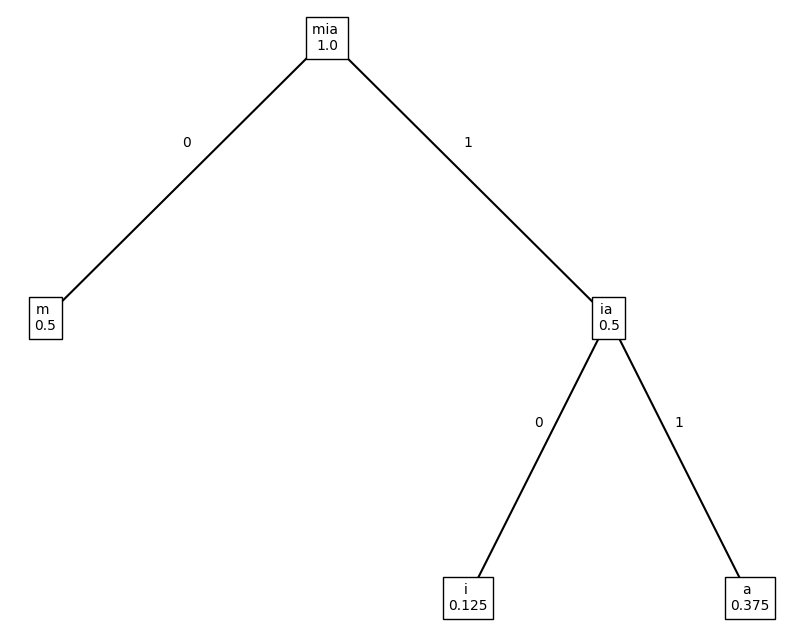

In [421]:
text = "mamma mia"
symbols, probs = conta_occurrenze_lettere(text)

x = Source(probs, symbs)
huffman_tree, _ = x.huffman(text)

fig, ax = plt.subplots(figsize=(10, 8))
plot_huffman_tree(huffman_tree, ax=ax)
ax.set_axis_off()
plt.show()


3. Write a program that, given an input text, finds the Huffman encoding of the 
text. A decoding procedure to recover the original message by starting from 
the Huffman encoding is also required.


In [426]:
# Generate Huffman code for the text
text = "mamma mia"
symbols, probs = conta_occurrenze_lettere(text)
x = Source(probs, symbs)
huffman_tree, code= x.huffman(text)


code = extract_code(code)
print(code)

print(text,':')
codedText = codingText(text, code)
print(codedText)  

Character: m, Probability: 0.5, Huffman Code: 0
Character: i, Probability: 0.125, Huffman Code: 10
Character: a, Probability: 0.375, Huffman Code: 11
{'m': '0', 'i': '10', 'a': '11'}
mamma mia :
011001101011


DECODIFICA:

In [432]:

def decodeText(codedText, code):
    
    decodedText = ''
    temp = ''
    for char in codedText:
        temp += char
        for key, value in code.items():
            if temp == value:
                decodedText += key
                temp = ''
    return decodedText

print(decodeText(codedText, code))

mammamia
